<a href="https://colab.research.google.com/github/Yashasvi-Vangala/V-QSP/blob/main/VQSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pyqsp
!pip install cma
!pip install cirq
!pip install qiskit
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 19.8 MB/s eta 0:00:00


[0.81324202+0.j]


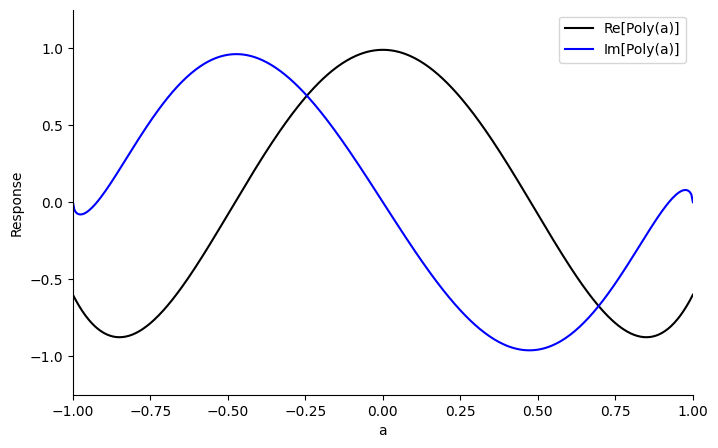

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyqsp import response
import cma
import time

true_phiset = np.random.random(5)
random_phiset = np.random.random(5)


adat = np.linspace(-1., 1., 400)

# Compute QSP response function directly according to method and convention.
res = response.ComputeQSPResponse([0],true_phiset)
print(res['pdat'])
qspr = response.ComputeQSPResponse(adat, true_phiset)

response.PlotQSPResponse(random_phiset)

In [4]:
#Sets up optimizer with initial guess and standard deviation.
#Standard Deviation should satiafy that optimal result is within "x0 + 3*sigma"

#Example with initial guess as (0,0,0,0,0,0,0,0) and sigma = 0.5
start = time.time()
es = cma.CMAEvolutionStrategy(8 * [0], 0.5)

#optimize the rosen function:

#Rosen(x) a non-convex funxtion in any space of even dimension with global optimum at (1,1,1,1,1,1,1,1)
#https://en.wikipedia.org/wiki/Rosenbrock_function
es.optimize(cma.ff.rosen)

#Final value is:
print(f"Final Result: {np.round(es.result[0])}, time elapsed (secs): {time.time()-start}")

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=161903, Tue Mar  4 22:43:45 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 1.128560417745678e+02 1.0e+00 4.52e-01  4e-01  5e-01 0:00.0
    2     20 1.130066411966580e+02 1.2e+00 4.15e-01  4e-01  4e-01 0:00.0
    3     30 4.699197159306128e+01 1.3e+00 3.79e-01  3e-01  4e-01 0:00.0
  100   1000 5.298475739496486e+00 5.9e+00 4.97e-02  1e-02  5e-02 0:00.3
  200   2000 1.011829187728444e+00 1.1e+01 7.27e-02  8e-03  3e-02 0:00.7
  300   3000 5.923948489789731e-03 3.1e+01 3.45e-02  1e-03  2e-02 0:01.1
  400   4000 3.714784675247149e-10 8.0e+01 4.60e-05  4e-07  2e-05 0:01.6
  453   4530 8.640389678585337e-15 6.8e+01 8.44e-07  5e-09  1e-07 0:01.9
Final Result: [1. 1. 1. 1. 1. 1. 1. 1.], time elapsed (secs): 3.6553330421447754


In [5]:
def cost(phiset):
  adat = np.linspace(-1., 1., 200)
  res = response.ComputeQSPResponse(adat,phiset)
  true_res = response.ComputeQSPResponse(adat,true_phiset)

  return sum(np.abs(res['pdat'] - true_res['pdat']))

start = time.time()
phi_es = cma.CMAEvolutionStrategy(random_phiset, 2*np.sqrt(5)/3, {'bounds': [0, 1]})

phi_es.optimize(cost)
print(f"True Phiset: {true_phiset}")
print(f"Final Result: {np.round(phi_es.result[0],3)}, time elapsed (secs): {time.time()-start}")


(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=269058, Tue Mar  4 22:43:48 2025)


/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=0 at iteration 0 change by 0.22360679774997896 to stds[0]=0.3333333333333333
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"
/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=1 at iteration 0 change by 0.22360456169318177 to stds[1]=0.33333333333333326
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"
/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=2 at iteration 0 change by 0.223602325658745 to stds[2]=0.3333333333333333
  warnings.warn("Sampling standard deviation i={0} at iteration {1}"
/usr/local/lib/python3.11/dist-packages/cma/evolution_strategy.py:1244: UserWarning: Sampling standard deviation i=3 at iteration 0 change by 0.22360008964666853 to stds[3]=0.3333333333333333
  warnings.warn("Sampling 

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.374680944153119e+01 1.0e+00 1.40e+00  3e-01  3e-01 0:00.2
    2     16 2.915822468403841e+01 1.2e+00 1.30e+00  3e-01  3e-01 0:00.4
    3     24 3.152043975364333e+01 1.2e+00 1.27e+00  3e-01  3e-01 0:00.6
   12     96 1.473605129972118e+01 2.3e+00 9.59e-01  1e-01  2e-01 0:03.6
   27    216 1.541047349457856e+01 4.8e+00 3.31e-01  2e-02  7e-02 0:07.6
   51    408 1.507189694760641e+01 8.3e+00 8.26e-02  3e-03  1e-02 0:12.7
   70    560 1.505773753546872e+01 7.1e+00 1.56e-02  6e-04  1e-03 0:18.7
   97    776 1.505763138144085e+01 8.1e+00 8.63e-04  2e-05  3e-05 0:26.0
  100    800 1.505763129564951e+01 7.7e+00 6.14e-04  1e-05  2e-05 0:26.6
  154   1232 1.505763129301218e+01 9.5e+00 3.08e-06  1e-08  2e-08 0:35.6
  156   1248 1.505763129301216e+01 9.2e+00 2.35e-06  9e-09  2e-08 0:36.0
True Phiset: [0.58131325 0.60651729 0.51299005 0.09731627 0.23062477]
Final Result: [0.253 0.415 0.649 0.351 0.334], time ela

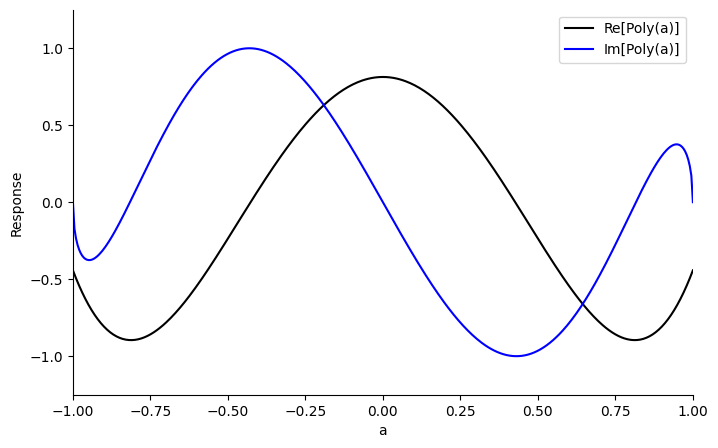

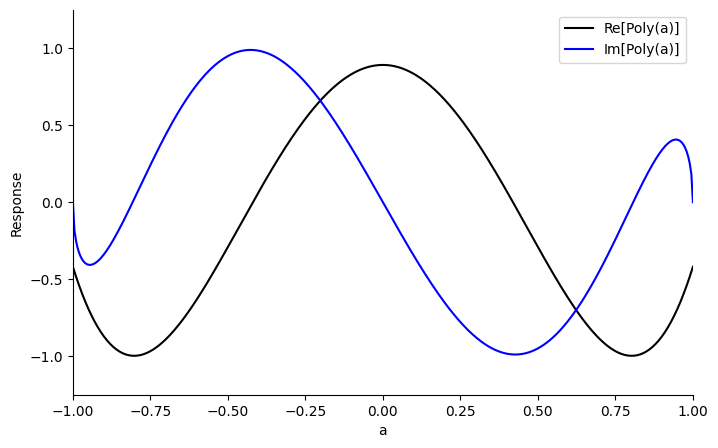

In [6]:
response.PlotQSPResponse(true_phiset)
response.PlotQSPResponse(phi_es.result[0])

In [7]:
# prompt: Can you write some code that simulates noise or coherent errors in the Rotation phi gates uses above? you may need to write some quantum circuits using qiskit

import numpy as np
import matplotlib.pyplot as plt
from pyqsp import response
import cma
import time
import cirq

# ... (previous code remains unchanged)

#This is a simple cost function
def cost_with_noise(phiset, noise_model):
  adat = np.linspace(-1., 1., 200)
  res = response.ComputeQSPResponse(adat, phiset, noise_model=noise_model)
  true_res = response.ComputeQSPResponse(adat, true_phiset)
  return sum(np.abs(res['pdat'] - true_res['pdat']))


# Define noise models
def depolarizing_noise(qubit, p):
    return cirq.depolarize(p)

def coherent_rotation_error(qubit, theta, phi):
    return cirq.Circuit(cirq.rz(theta)(qubit), cirq.rx(phi)(qubit))


# Example usage with depolarizing noise
noise_prob = 0.01 # Example noise probability. Adjust as needed
noise_model = {'noise': depolarizing_noise, 'params': [noise_prob]}

start = time.time()
phi_es = cma.CMAEvolutionStrategy(random_phiset, 2*np.sqrt(5)/3, {'bounds': [0, 1]})
phi_es.optimize(lambda x: cost_with_noise(x, noise_model))
print(f"True Phiset: {true_phiset}")
print(f"Final Result (with depolarizing noise): {np.round(phi_es.result[0],3)}, time elapsed (secs): {time.time()-start}")

response.PlotQSPResponse(true_phiset)
response.PlotQSPResponse(phi_es.result[0])

# Example usage with coherent rotation error
theta_error = 0.1  # Example error parameters
phi_error = 0.2

noise_model = {'noise': coherent_rotation_error, 'params': [theta_error, phi_error]}

start = time.time()
phi_es = cma.CMAEvolutionStrategy(random_phiset, 2*np.sqrt(5)/3, {'bounds': [0, 1]})

phi_es.optimize(lambda x: cost_with_noise(x, noise_model))

print(f"True Phiset: {true_phiset}")
print(f"Final Result (with coherent rotation error): {np.round(phi_es.result[0],3)}, time elapsed (secs): {time.time()-start}")

response.PlotQSPResponse(true_phiset)
response.PlotQSPResponse(phi_es.result[0])


TypeError: DaskFinder.find_spec() got an unexpected keyword argument 'path'